In [10]:

import csv
with open('dat.csv', 'r') as f: 
    reader = csv.reader(f)
    headers = next(reader) 
    your_list = list(reader)
#     print(your_list)
h = [['0', '0', '0', '0', '0', '0']]
for i in your_list:
    print(i)
    if i[-1] == "TRUE":
        j = 0
        for x in i:
            if x != "TRUE":
                if x != h[0][j] and h[0][j] == '0':
                    h[0][j] = x
                elif x != h[0][j] and h[0][j] != '0':
                    h[0][j] = '?' 
                j = j + 1
print("The maximally specific hypothesis for a given training example is: ") 
print(h)

["'Sunny'", "'Warm'", "'Normal'", "'Strong'", "'Warm'", "'Same'", 'TRUE']
["'Sunny'", "'Warm'", "'High'", "'Strong'", "'Warm'", "'Same'", 'TRUE']
["'Rainy'", "'Cold'", "'High'", "'Strong'", "'Warm'", "'Change'", 'FALSE']
["'Sunny'", "'Warm'", "'High'", "'Strong'", "'Cool'", "'Change'", 'TRUE']
The maximally specific hypothesis for a given training example is: 
[["'Sunny'", "'Warm'", '?', "'Strong'", '?', '?']]


In [8]:
import csv

with open('dat.csv', 'r') as f: 
    reader = csv.reader(f)
    headers = next(reader) 
    data = list(reader)
    
h = [['0', '0', '0', '0', '0', '0']]
for i in data:
    if i[-1] == "TRUE":
        for j, x in enumerate(i):
            if x != "TRUE" and (x != h[0][j] and h[0][j] != '0'):
                h[0][j] = '?' if h[0][j] != '0' else x
print("The maximally specific hypothesis for a given training example is: ") 
print(h)


The maximally specific hypothesis for a given training example is: 
[['0', '0', '0', '0', '0', '0']]


In [17]:
import csv

with open('dat.csv','r') as f:
    reader=csv.reader(f)
    header=next(reader)
    l=list(reader)
h=[['0','0','0','0','0','0']]
for i in l:
    print(i)
    if i[-1]=="TRUE":
        j=0

        for x in i:
            if x != "TRUE":
                if x != h[0][j] and h[0][j]=="0":
                    h[0][j]=x
                elif x != h[0][j] and h[0][j] !="0":
                    h[0][j]="?"
                j+=1
print("maximally specific hypothesis")

h

["'Sunny'", "'Warm'", "'Normal'", "'Strong'", "'Warm'", "'Same'", 'TRUE']
["'Sunny'", "'Warm'", "'High'", "'Strong'", "'Warm'", "'Same'", 'TRUE']
["'Rainy'", "'Cold'", "'High'", "'Strong'", "'Warm'", "'Change'", 'FALSE']
["'Sunny'", "'Warm'", "'High'", "'Strong'", "'Cool'", "'Change'", 'TRUE']
maximally specific hypothesis


[["'Sunny'", "'Warm'", '?', "'Strong'", '?', '?']]

estimated coefficients:
b_0=1.2363636363636363
b_1=1.1696969696969697


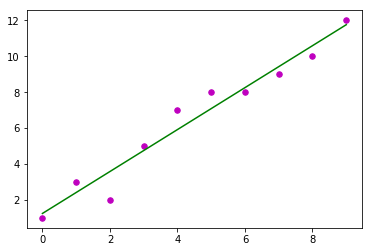

In [19]:
#3

import numpy as np 
import matplotlib.pyplot as plt
def estimate_coef(x, y):
    n =np.size(x)
    m_x,m_y=np.mean(x),np.mean(y)
    SS_xy=np.sum(y*x)-n*m_y*m_x
    SS_xx=np.sum(x*x)-n*m_x*m_x
    b_1=SS_xy/SS_xx
    b_0=m_y-b_1*m_x
    return(b_0,b_1)
def plot_regline(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    y_pred=b[0]+b[1]*x
    plt.plot(x, y_pred, color = "g")
#     plt.xlabel('x')
#     plt.ylabel('y')
    plt.show()
def main():
    x=np.array([0,1,2,3,4,5,6,7,8,9])
    y=np.array([1,3,2,5,7,8,8,9,10,12])
    b=estimate_coef(x,y)
    print("estimated coefficients:\nb_0={}\nb_1={}".format(b[0],b[1]))
    plot_regline(x,y,b)
main()

1.2363636363636363
1.1696969696969697


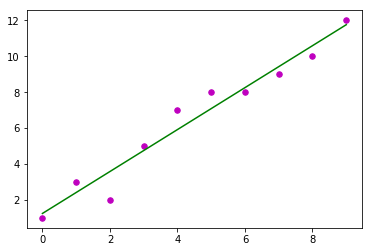

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def coef(x,y):
    n=np.size(x)
    mx=np.mean(x)
    my=np.mean(y)
    
    sy=np.sum(y*x)-n * my * mx
    sx=np.sum(x*x)-n * mx * mx
    
    b1=sy/sx
    b0=my-b1*mx
    
    return(b0,b1)

def plot(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    by=b[0]+b[1]*x
    
    plt.plot(x,by,color="g")
    plt.show()
    
def main():
    x=np.array([0,1,2,3,4,5,6,7,8,9])
    y=np.array([1,3,2,5,7,8,8,9,10,12])
    
    b=coef(x,y)
    print(b[0])
    print(b[1])
    plot(x,y,b)
main()

In [18]:
#5
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)
epoch=5000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89630337]
 [0.88092038]
 [0.89222273]]


In [5]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100

def sigmoid(x):
    return 1/(1 + np.exp(-x))

epoch=5000
lr=0.1
il = 2
hl = 3
ol = 1

wh=np.random.uniform(size=(il,hl))
bh=np.random.uniform(size=(1,hl))
wout=np.random.uniform(size=(hl,ol))
bout=np.random.uniform(size=(1,ol))

for i in range(epoch):
    hinp = np.dot(X,wh) + bh
    hlayer_act = sigmoid(hinp)
    outinp = np.dot(hlayer_act,wout) + bout
    output = sigmoid(outinp)
#     EO = y-output
#     outgrad = output * (1 - output)
#     d_output = EO* outgrad
#     EH = d_output.dot(wout.T)
#     hiddengrad = hlayer_act * (1 - hlayer_act)
#     d_hiddenlayer = EH * hiddengrad
#     wout += hlayer_act.T.dot(d_output) *lr
#     wh += X.T.dot(d_hiddenlayer) *lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.72030159]
 [0.70050988]
 [0.71969897]]


array([[0.97175697, 0.51875626, 0.3233439 ],
       [0.40761632, 0.72824672, 0.48803768]])

In [13]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) / np.amax(X, axis=0)
y = np.array(([92], [86], [89]), dtype=float) / 100

def sigmoid(x):
    return 1/(1 + np.exp(-x))

epoch = 5000
lr = 0.1
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

wh = np.random.uniform(size=(input_neurons, hidden_neurons))
bh = np.random.uniform(size=(1, hidden_neurons))
wout = np.random.uniform(size=(hidden_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

for _ in range(epoch):
    hinp = np.dot(X, wh) + bh
    hlayer_act = sigmoid(hinp)
    outinp = np.dot(hlayer_act, wout) + bout
    output = sigmoid(outinp)
    EO = y - output
    outgrad = output * (1 - output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = hlayer_act * (1 - hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) * lr
    wh += X.T.dot(d_hiddenlayer) * lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[2. 9.]
 [1. 5.]
 [3. 6.]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89465485]
 [0.87745737]
 [0.89706512]]


In [28]:
#10
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets

iris=datasets.load_iris() 
print("Iris Data set loaded...") 
iris_data=iris.data
iris_labels=iris.target #print(iris_data) print(iris_labels)
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.1) 
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape) 
print("Size of trainng data and its label",x_test.shape, y_test.shape)
 

 


# Prints Label no. and their names 
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))

classifier=KNeighborsClassifier(n_neighbors=1) 
classifier.fit(x_train,y_train) 
y_pred=classifier.predict(x_test)

# Display the results
print("Results of Classification using K-nn with K=1 ") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r])) 
print("Classification Accuracy :" , classifier.score(x_test,y_test))

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [5.1 3.3 1.7 0.5]  Actual-label: 0  Predicted-label: 0
 Sample: [6.4 2.9 4.3 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2  Predicted-label: 2
 Sample: [5.8 4.  1.2 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.6 3.4 1.4 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [5.6 2.7 4.2 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.2 3.5 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.5 3.  5.2 2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [6.5 3.  5.8 2.2]  Actual-label: 2  Predicted-label: 2
 Sample: [7.7 2.6 6.9 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [6.1 2.8 4.7 1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.9 5.6

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets

iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

classifier = KNeighborsClassifier(n_neighbors=1) 
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)

print("Results of Classification using K-nn with K=1:") 
for r in range(0, len(x_test)):
    print("Sample:", x_test[r], "Actual-label:", y_test[r], "Predicted-label:", y_pred[r]) 
print("Classification Accuracy:", classifier.score(x_test, y_test))


Results of Classification using K-nn with K=1:
Sample: [5.6 2.7 4.2 1.3] Actual-label: 1 Predicted-label: 1
Sample: [7.1 3.  5.9 2.1] Actual-label: 2 Predicted-label: 2
Sample: [7.2 3.2 6.  1.8] Actual-label: 2 Predicted-label: 2
Sample: [6.1 2.8 4.7 1.2] Actual-label: 1 Predicted-label: 1
Sample: [5.  2.3 3.3 1. ] Actual-label: 1 Predicted-label: 1
Sample: [6.7 3.1 4.7 1.5] Actual-label: 1 Predicted-label: 1
Sample: [6.3 2.9 5.6 1.8] Actual-label: 2 Predicted-label: 2
Sample: [5.8 2.6 4.  1.2] Actual-label: 1 Predicted-label: 1
Sample: [5.  3.4 1.5 0.2] Actual-label: 0 Predicted-label: 0
Sample: [6.4 3.1 5.5 1.8] Actual-label: 2 Predicted-label: 2
Sample: [5.1 3.8 1.6 0.2] Actual-label: 0 Predicted-label: 0
Sample: [5.1 3.5 1.4 0.2] Actual-label: 0 Predicted-label: 0
Sample: [5.6 2.8 4.9 2. ] Actual-label: 2 Predicted-label: 2
Sample: [6.3 2.7 4.9 1.8] Actual-label: 2 Predicted-label: 2
Sample: [4.9 3.1 1.5 0.1] Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()
iris_data=iris.data
ilabel = iris.target

xt,xtt,yt,ytt=train_test_split(iris_data,ilabel,test_size=0.1)

print(xt.shape, yt.shape)
print(xtt.shape, ytt.shape)

for i in range(len(iris.target_names)):
    print(i,"-->", iris.target_names[i])
    
cf=KNeighborsClassifier(n_neighbors=1)
cf.fit(xt,yt)

pred=cf.predict(xtt)

for r in range(0,len(xtt)):
    print("input: ", str(xtt[r]), "actual output: ",str(ytt[r]), "predicted output: ", str(pred[r]))



(135, 4) (135,)
(15, 4) (15,)
0 --> setosa
1 --> versicolor
2 --> virginica
input:  [5.  3.4 1.6 0.4] actual output:  0 predicted output:  0
input:  [4.9 3.1 1.5 0.2] actual output:  0 predicted output:  0
input:  [6.7 3.  5.  1.7] actual output:  1 predicted output:  1
input:  [7.7 2.6 6.9 2.3] actual output:  2 predicted output:  2
input:  [5.1 3.8 1.9 0.4] actual output:  0 predicted output:  0
input:  [5.1 3.5 1.4 0.2] actual output:  0 predicted output:  0
input:  [5.1 3.7 1.5 0.4] actual output:  0 predicted output:  0
input:  [6.4 3.2 4.5 1.5] actual output:  1 predicted output:  1
input:  [7.6 3.  6.6 2.1] actual output:  2 predicted output:  2
input:  [4.6 3.1 1.5 0.2] actual output:  0 predicted output:  0
input:  [6.6 2.9 4.6 1.3] actual output:  1 predicted output:  1
input:  [6.3 2.3 4.4 1.3] actual output:  1 predicted output:  1
input:  [4.8 3.1 1.6 0.2] actual output:  0 predicted output:  0
input:  [5.2 3.4 1.4 0.2] actual output:  0 predicted output:  0
input:  [5.4 3